Q: Produce a scatterplot matrix which includes all of the variables in the data set.

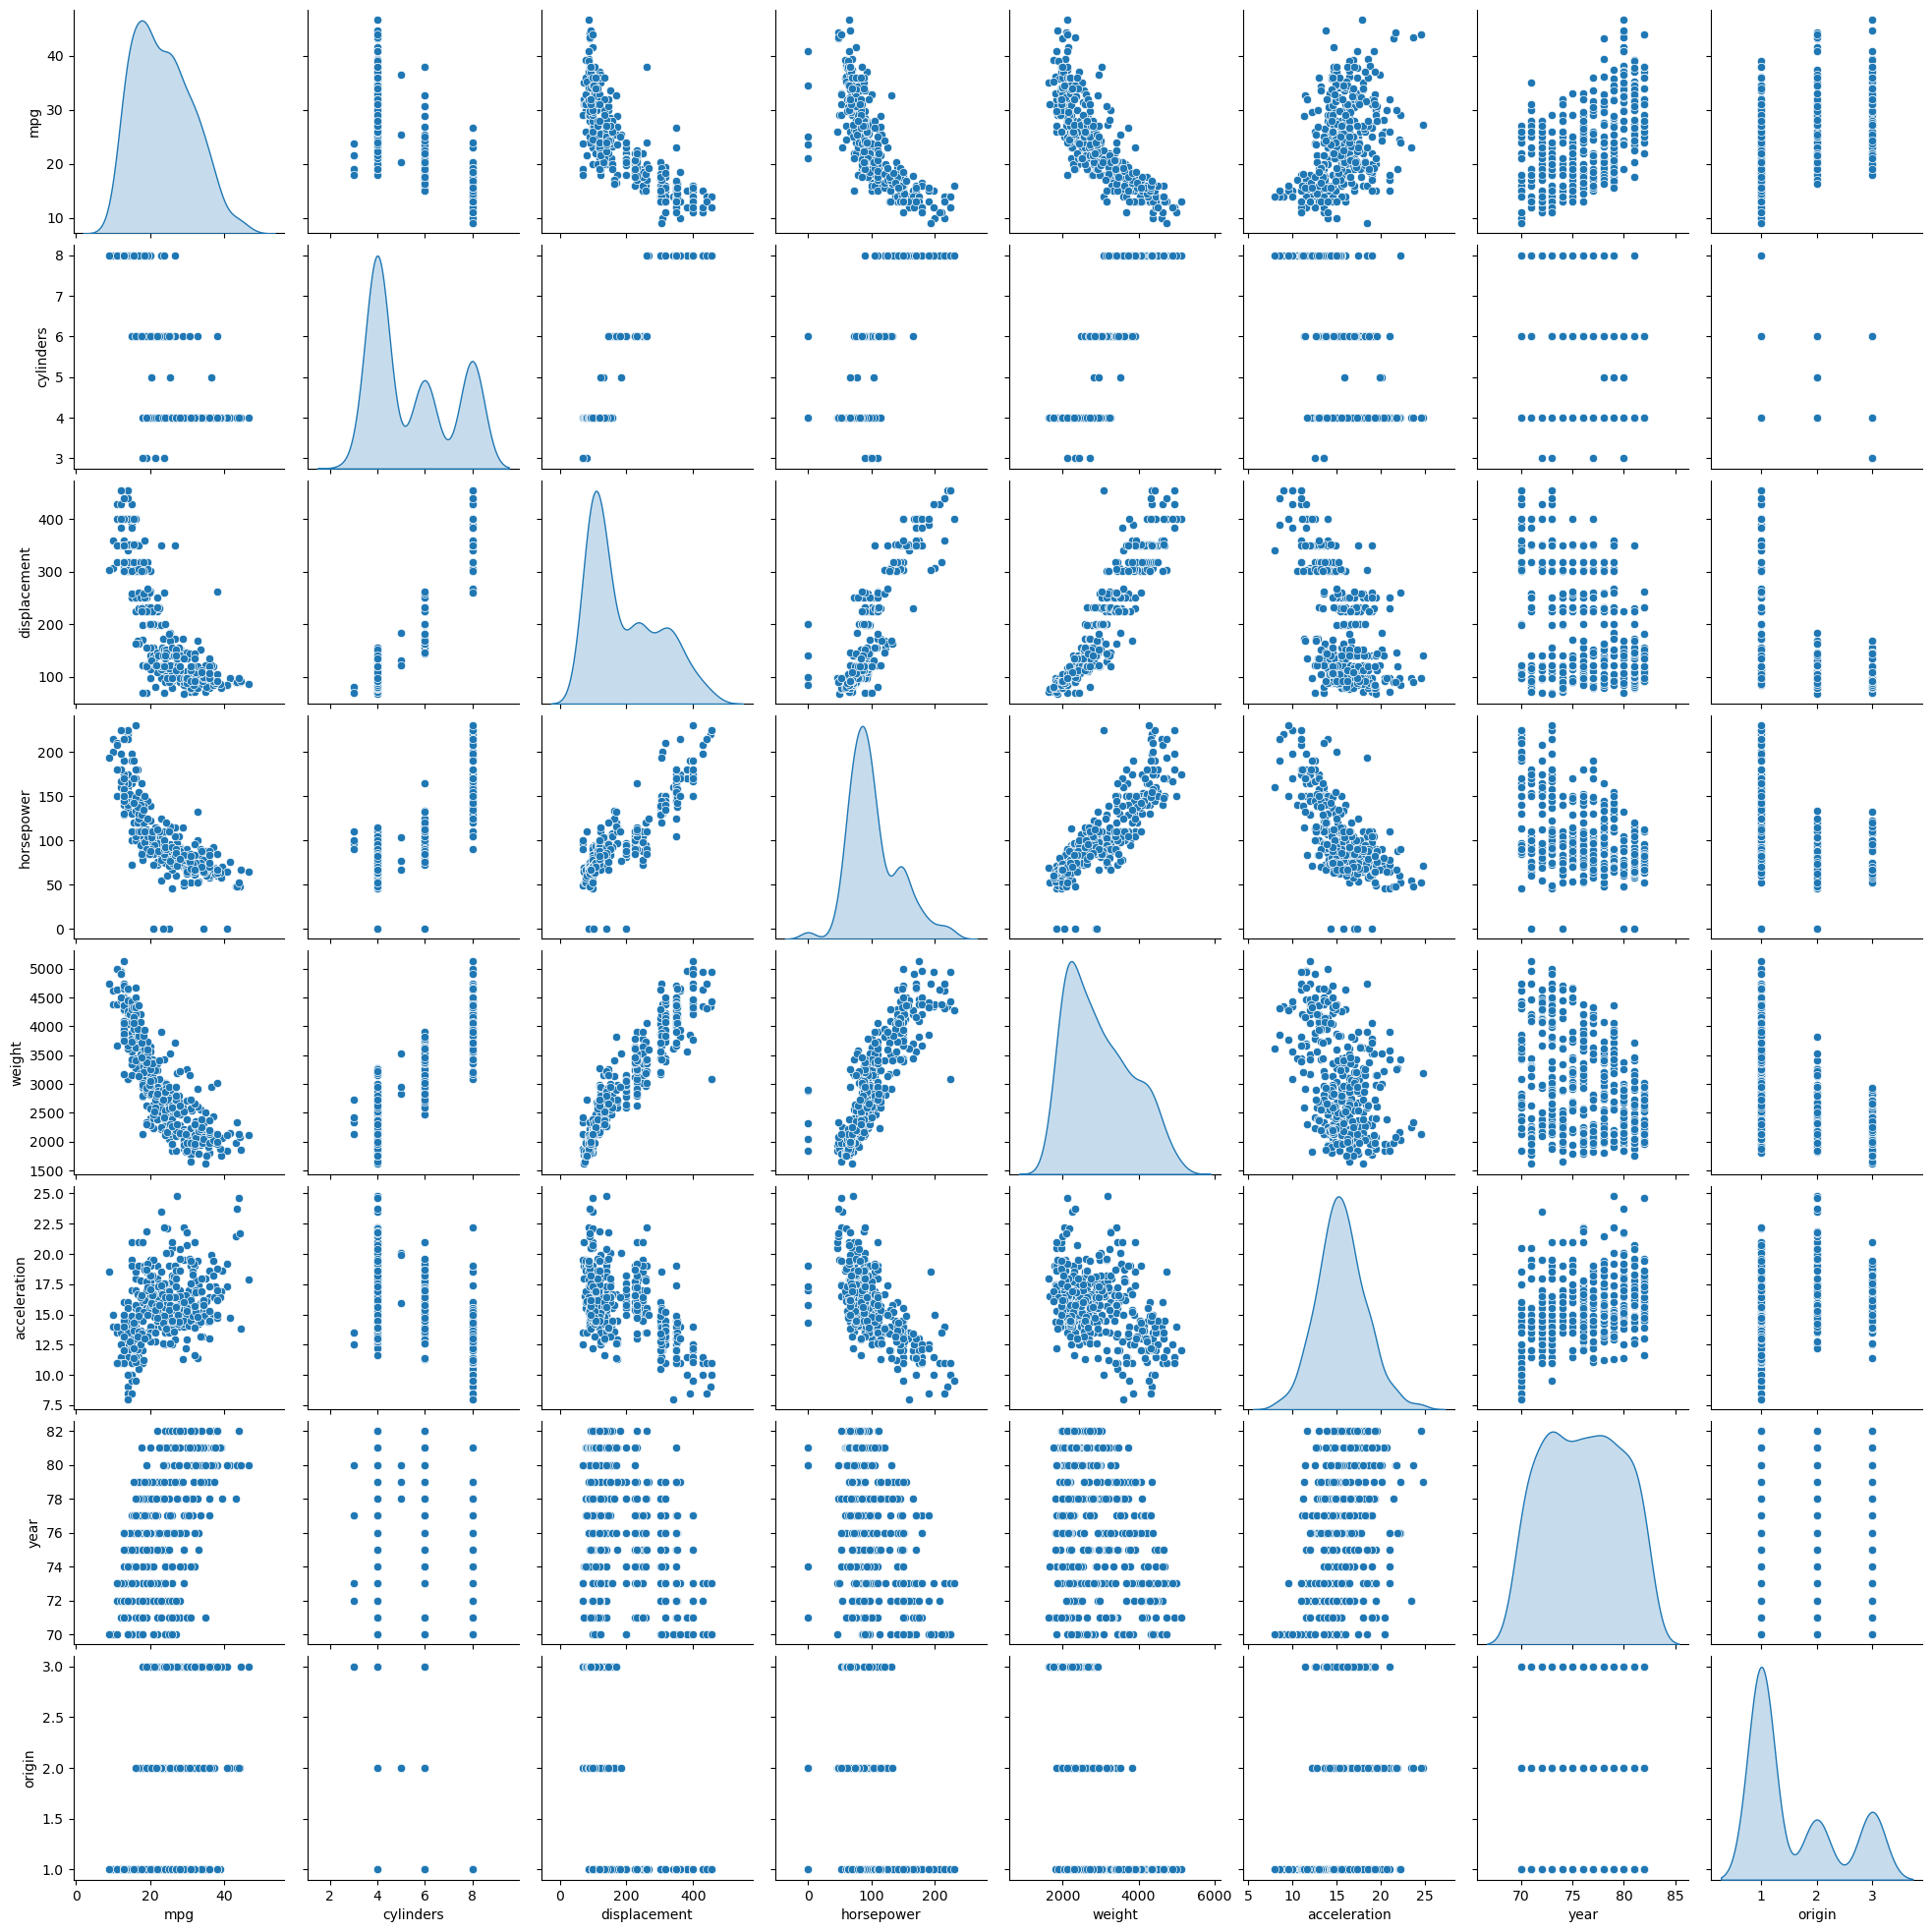

In [24]:
#A:

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("Auto.csv")

#I placed the values in a number close to 0, because 0 caused me problems

df['horsepower'] = df['horsepower'].replace('?', 0.00000001)

df['horsepower'] = pd.to_numeric(df['horsepower'])

sns.pairplot(df, diag_kind = "kde")


Q: Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [4]:
#A:

df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.761004,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.823711,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.876741,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.761004,0.823711,0.876741,1.000000,0.845483,-0.670643,-0.405830,-0.427052
weight,-0.831739,0.897017,0.933104,0.845483,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.670643,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.405830,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.427052,-0.581265,0.210084,0.184314,1.000000


Q: Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

In [25]:
X = df.drop(["mpg", "name"], axis=1)
y = df["mpg"]
X = sm.add_constant(X)

model= sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.28e-141
Time:                        19:06:14   Log-Likelihood:                -1036.8
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9640      4.449     -4.038   

i: The p-value is 2.39e-11 so it is practically impossible for the null hypothesis to be true

ii: Using the coefficient p-values in the model output, and p = 0.03 as my threshold for significance, all variables except cylinders, horsepower & acceleration have a statistically significant relationship with the response.

iii: Omplies that each 1 year increase increases 0.7574 in mpg

Q: Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

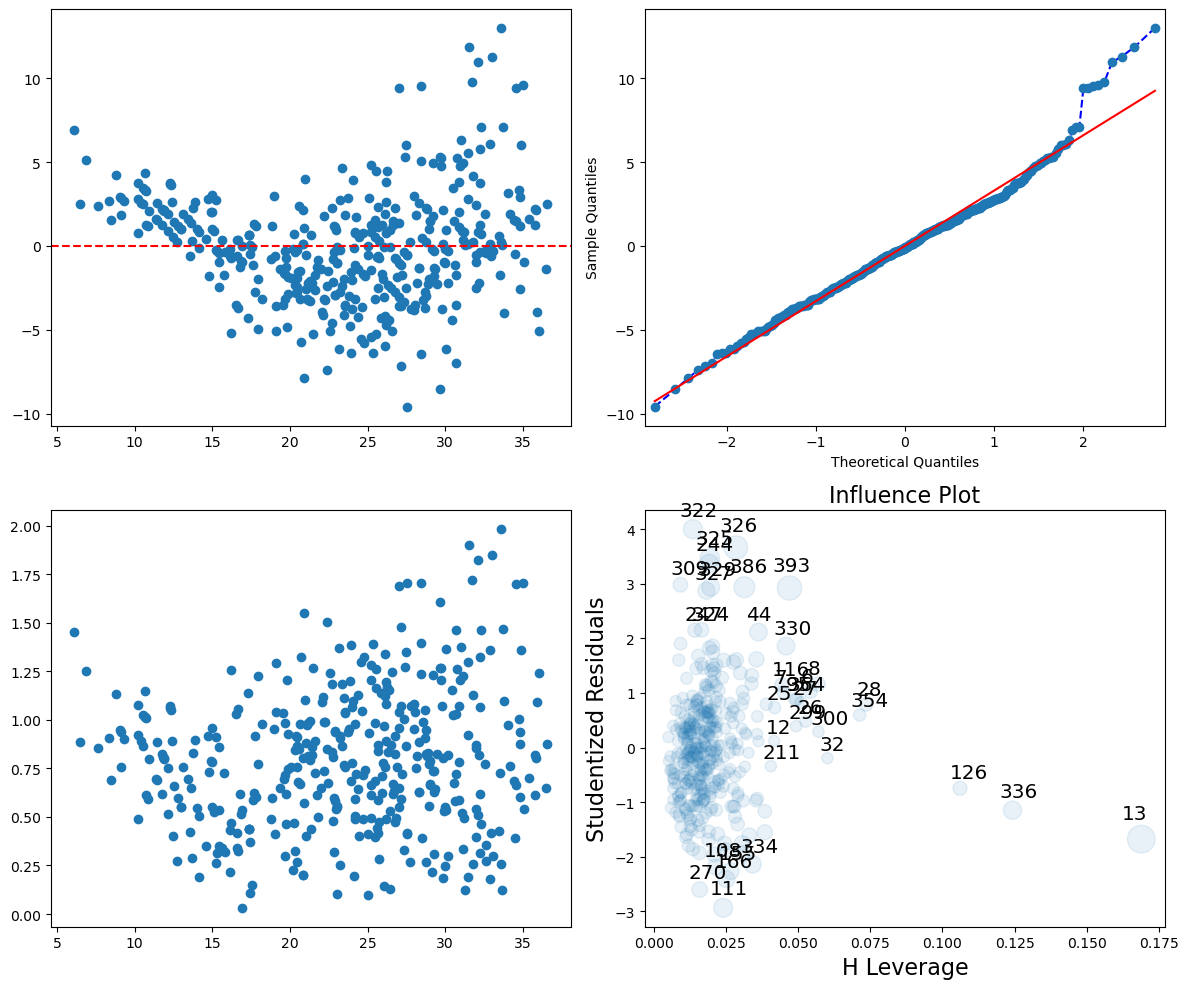

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(model.fittedvalues, model.resid)
axes[0, 0].axhline(y=0, color="red", linestyle="dashed")

sm.qqplot(model.resid, line="s",linestyle="dashed", ax=axes[0, 1])

axes[1, 0].scatter(model.fittedvalues, abs(model.get_influence().resid_studentized_internal)**0.5)


sm.graphics.influence_plot(model, ax=axes[1, 1],criterion= "Cooks", plot_alpha= 0.1, size =20)

plt.tight_layout()

plt.show()

In [57]:
stats = model.get_influence().summary_frame()
stats.reset_index(drop=True, inplace=True)
stats["rownames"] = stats.index
stats = stats[["rownames", "hat_diag","dffits", "standard_resid", "cooks_d","student_resid"]]
stats = stats.sort_values(by="cooks_d", ascending=False)

print(stats)

     rownames  hat_diag    dffits  standard_resid       cooks_d  student_resid
13         13  0.168893 -0.757129       -1.675630  7.132171e-02      -1.679547
393       393  0.047024  0.649402        2.895502  5.171217e-02       2.923453
326       326  0.028452  0.627438        3.609220  4.768457e-02       3.666490
386       386  0.031384  0.529055        2.910726  3.431356e-02       2.939166
325       325  0.019397  0.488025        3.421705  2.894945e-02       3.469922
..        ...       ...       ...             ...           ...            ...
319       319  0.016790  0.002035        0.015594  5.190533e-07       0.015574
265       265  0.012955  0.001380        0.012057  2.385012e-07       0.012041
178       178  0.015205 -0.001271       -0.010241  2.023992e-07      -0.010227
184       184  0.012647 -0.001053       -0.009316  1.389627e-07      -0.009304
289       289  0.015595  0.000129        0.001027  2.086746e-09       0.001025

[397 rows x 6 columns]


In [60]:
nrow = len(df)
stats['cooksd_cutoff'] = ['True' if x >= 4 / nrow else 'False' for x in stats['cooks_d']]

print(stats)

     rownames  hat_diag    dffits  standard_resid       cooks_d  \
13         13  0.168893 -0.757129       -1.675630  7.132171e-02   
393       393  0.047024  0.649402        2.895502  5.171217e-02   
326       326  0.028452  0.627438        3.609220  4.768457e-02   
386       386  0.031384  0.529055        2.910726  3.431356e-02   
325       325  0.019397  0.488025        3.421705  2.894945e-02   
..        ...       ...       ...             ...           ...   
319       319  0.016790  0.002035        0.015594  5.190533e-07   
265       265  0.012955  0.001380        0.012057  2.385012e-07   
178       178  0.015205 -0.001271       -0.010241  2.023992e-07   
184       184  0.012647 -0.001053       -0.009316  1.389627e-07   
289       289  0.015595  0.000129        0.001027  2.086746e-09   

     student_resid cooksd_cutoff  
13       -1.679547          True  
393       2.923453          True  
326       3.666490          True  
386       2.939166          True  
325       3.469922  

<Axes: xlabel='hat_diag', ylabel='standard_resid'>

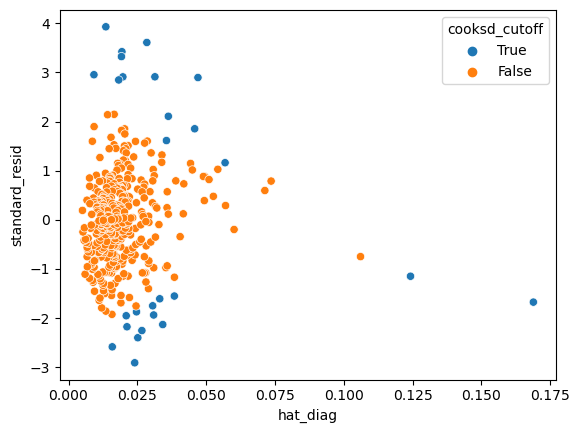

In [73]:
sns.scatterplot(x=stats['hat_diag'], y=stats['standard_resid'],hue=stats['cooksd_cutoff'])

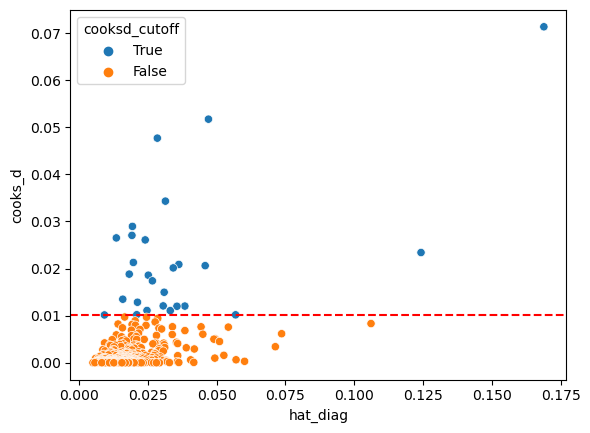

In [72]:
sns.scatterplot(x=stats['hat_diag'], y=stats['cooks_d'],hue=stats['cooksd_cutoff'])

plt.axhline(y=4 / len(df), color='red', linestyle='dashed')

A: High leverage and high residual statistics can be observed

Q: Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [18]:
#A:

Xi = X.copy()

for col1 in X.columns:
    for col2 in X.columns:
        if col1 != col2:
            interm = col1 + ":" + col2
            Xi[interm] = X[col1] * X[col2]

Xi = sm.add_constant(X_interaction)

modeli = sm.OLS(y, X_interaction).fit()

modelis = modeli.summary()

signif = modeli.pvalues[modeli.pvalues < 0.05].index

print(modelis)

print(signif)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.34e-157
Time:                        18:56:39   Log-Likelihood:                -942.24
No. Observations:                 397   AIC:                             1942.
Df Residuals:                     368   BIC:                             2058.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [26]:
#A:

transformations = {
    'log': np.log,
    'sqrt': np.sqrt,
    'squared': lambda x: x ** 2
}

for col in X.columns:
    for trans_name, transformation in transformations.items():
        X_transformed = X.copy()
        X_transformed[col] = transformation(X[col])
        X_transformed = sm.add_constant(X_transformed)

        model_transformed = sm.OLS(y, X_transformed).fit()
        
        print(f"Transformación: {trans_name}, Variable: {col}")
        print(model_transformed.summary())
        print("-------------------------------------------------------------------")

Transformación: log, Variable: const
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.28e-141
Time:                        19:06:23   Log-Likelihood:                -1036.8
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const      

Transformación: log, Variable: origin
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.0
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          2.01e-142
Time:                        19:06:23   Log-Likelihood:                -1034.9
No. Observations:                 397   AIC:                             2086.
Df Residuals:                     389   BIC:                             2118.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     